# Prediction using Supervised ML
* Predict the percentage of students based on the no. of study hours
* Dataset link: http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/day

## Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
%matplotlib inline

## Load the dataset

In [100]:
url='http://bit.ly/w-data'
df= pd.read_csv(url)

In [101]:
# dataset shape
#no. of training examples and features
df.shape

(25, 2)

In [102]:
# first five examples
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


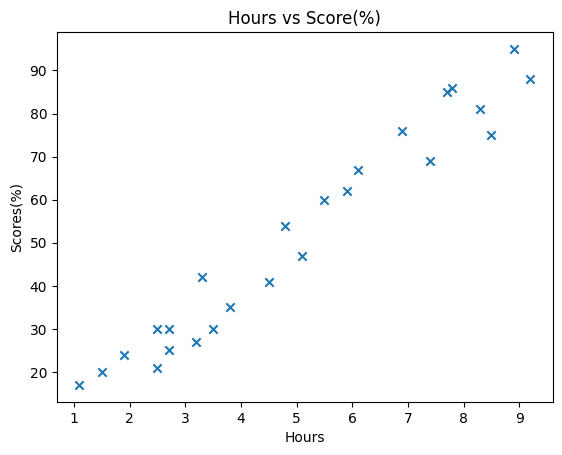

In [103]:
plt.title('Hours vs Score(%)')
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.scatter(df.Hours, df.Scores, marker='x')

## Data preprocessing

In [104]:
# check for null values
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [105]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [106]:
# split dataset into features and true label
X,y= df[['Hours']],df.Scores

In [107]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

## Build Model

In [108]:
model= linear_model.LinearRegression()

In [109]:
# train model
model.fit(X_train,y_train)

LinearRegression()

## Prediction

In [110]:
pred=model.predict(X_test)

In [111]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [112]:
# Plotting the regression line
line =model.coef_*X+model.intercept_

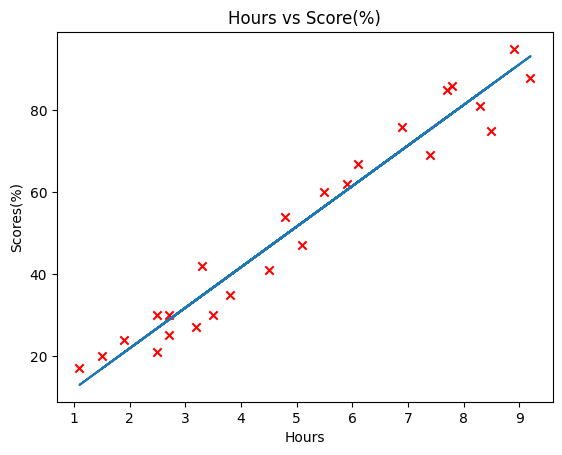

In [113]:
plt.title('Hours vs Score(%)')
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.scatter(X, y, marker='x', color='red')
plt.plot(X,line)

In [114]:
# score if student studies 9.25 hrs/day
hours=9.25
score= model.predict([[hours]])
print('No. of hours studied =',hours)
print('Predicted score =',score)


No. of hours studied = 9.25
Predicted score = [93.69173249]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluation

In [115]:
# Using mean_absolute_error to evaluate the model
error= mean_absolute_error(y_test,pred)
print('Mean Absolute Error = ',error.round(3))

Mean Absolute Error =  4.184
